<a href="https://colab.research.google.com/github/JBRo7/Product_Inventory/blob/master/Trails.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trails Application

This app will be used to make predictions based on values within a CSV file. 

To Begin, the user will select each cell and press play in the top left corner of each cell to begin running.

##Imports

In [ ]:
from google.colab import files
import io
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#Get the Data

##Get the CSV file to work on Colab. 

CSV file was originally downloaded from Kaggle. 

Address:
 https://www.kaggle.com/datasets/paultimothymooney/trailstrailheadsandrockformationsinboulder?select=OSMP_Trails.csv

File Name: 
OSMP_Trails.csv

In [ ]:
#Load the CSV File
uploaded = files.upload()

#Select the OSMP_Trails.csv file.

Saving OSMP_Trails.csv to OSMP_Trails.csv


In [ ]:
#removed the mounted version, to make the app easier to use.
#TrailsDF = pd.read_csv("drive/MyDrive/OSMP_Trails.csv")


TrailsDF = pd.read_csv(io.BytesIO(uploaded['OSMP_Trails.csv']))
pd.options.display.max_columns = None

TrailsDF.head()

,GISPROD3OSMPTrailsOSMPOBJECTID,GISPROD3OSMPTrailsOSMPOWNER,GISPROD3OSMPTrailsOSMPBICYCLES,GISPROD3OSMPTrailsOSMPDISPLAY,GISPROD3OSMPTrailsOSMPTRAILTYPE,GISPROD3OSMPTrailsOSMPDATEFROM,GISPROD3OSMPTrailsOSMPDATETO,GISPROD3OSMPTrailsOSMPSEGMENTID,GISPROD3OSMPTrailsOSMPHORSES,GISPROD3OSMPTrailsOSMPRID,GISPROD3OSMPTrailsOSMPTRLID,GISPROD3OSMPTrailsOSMPMILEAGE,GISPROD3OSMPTrailsOSMPMEASUREDFEET,GISPROD3OSMPTrailsOSMPTRAILNAME,GISPROD3OSMPTrailsOSMPGlobalID,GISPROD3OSMPTrailsOSMPDIFFICULTY,GISPROD3OSMPTrailsOSMPDOGS,GISPROD3OSMPTrailsOSMPDOGREGGEN,GISPROD3OSMPTrailsOSMPDOGREGDESC,GISPROD3OSMPTrailClosuresOBJECTID,GISPROD3OSMPTrailClosuresRID,GISPROD3OSMPTrailClosuresCLOSUREDURATION,GISPROD3OSMPTrailClosuresWEBLINK,GISPROD3OSMPTrailClosuresCLOSUREAREA,GISPROD3OSMPTrailClosuresTRAILSTATUS,GISPROD3OSMPTrailClosuresCLOSUREREASON,GISPROD3OSMPTrailClosuresLOCATIONDESCRIPTION,GISPROD3OSMPTrailClosuresCONTACT,GISPROD3OSMPTrailClosuresCOMMENTS,GISPROD3OSMPTrailClosuresGLOBALID,GISPROD3OSMPTrailClosuresSEGMENTID
0,2666,OSMP,No,Yes,Hiking Trail,2005/12/31 00:00:00+00,2099/12/31 00:00:00+00,289-334-332,Yes,1421,289,0.948,-9999.0,Mount Sanitas,{CFAEE852-8E0E-4C58-B03F-161E89CEE05E},Difficult,Yes,LVS,"Leash, Or Voice and Sight Control",1076,1421.0,NaN,NaN,NaN,Open,NaN,NaN,https://bouldercolorado.gov/services/osmp-clos...,NaN,{82CC873D-4FC7-4812-B6A1-0941D20C9A6F},289-334-332
1,2667,OSMP,No,Yes,Hiking Trail,2005/12/31 00:00:00+00,2099/12/31 00:00:00+00,289-332-330,Yes,1422,289,0.108,-9999.0,Mount Sanitas,{E79F0638-7271-46BE-85C5-511B9FA99611},Difficult,Yes,LVS,"Leash, Or Voice and Sight Control",1077,1422.0,NaN,NaN,NaN,Open,NaN,NaN,https://bouldercolorado.gov/services/osmp-clos...,NaN,{C1D212D8-B4F4-4873-A409-CCE908CB2F5E},289-332-330
2,2668,OSMP,No,Yes,Hiking Trail,2005/12/31 00:00:00+00,2099/12/31 00:00:00+00,289-330-329,Yes,1424,289,0.028,-9999.0,Mount Sanitas,{D97F02B7-AA16-4FB1-AD7A-B8CC1A79E409},Difficult,Yes,LVS,"Leash, Or Voice and Sight Control",1078,1424.0,NaN,NaN,NaN,Open,NaN,NaN,https://bouldercolorado.gov/services/osmp-clos...,NaN,{2AFC9A76-9C71-401B-BC86-13F1D8F470E3},289-330-329
3,2669,OSMP,No,Yes,Hiking Trail,2005/12/31 00:00:00+00,2099/12/31 00:00:00+00,289-329-328,Yes,1423,289,0.102,-9999.0,Mount Sanitas,{B2FFBAF8-5CA4-4DDE-9EF5-B83CCF6C50BB},Difficult,Yes,LVS,"Leash, Or Voice and Sight Control",1079,1423.0,NaN,NaN,NaN,Open,NaN,NaN,https://bouldercolorado.gov/services/osmp-clos...,NaN,{336ED61F-CED6-4455-BC44-CB914AB379C7},289-329-328
4,2671,OSMP,Yes,Yes,Multi-Use Trail,2017/07/20 00:00:00+00,2099/12/31 00:00:00+00,518-678-538,Yes,1624,518,0.812,-9999.0,IBM Connector,{A9DFFC63-5D1B-4392-81C0-949DFD8392E4},Easy,Yes,LR,Leash Required,1604,1624.0,Until Further Notice,NaN,NaN,Open,Construction,NaN,https://bouldercolorado.gov/services/osmp-clos...,NaN,{13A86ADE-5F3C-42DF-9BB4-2068A290C8E4},518-678-538


#Delete Columns

Remove columns that are not going to be used.

In [ ]:
TrailsDF.drop(TrailsDF.columns[[1, 7, 9, 10, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30]], axis=1, inplace=True)

IndexError: ignored

#Rename Columns

Give Columns unique names so that they are easily identifiable.
This will make them easier to use later on

In [ ]:
TrailsDF.rename({"GISPROD3OSMPTrailsOSMPOBJECTID": "ID", "GISPROD3OSMPTrailsOSMPBICYCLES": "Bicycles", "GISPROD3OSMPTrailsOSMPDISPLAY": "Display", "GISPROD3OSMPTrailsOSMPTRAILTYPE": "TrailType", "GISPROD3OSMPTrailsOSMPDATEFROM": "DateFrom", "GISPROD3OSMPTrailsOSMPDATETO": "DateTo", "GISPROD3OSMPTrailsOSMPHORSES": "Horses", "GISPROD3OSMPTrailsOSMPMILEAGE": "Mileage", "GISPROD3OSMPTrailsOSMPMEASUREDFEET": "Height", "GISPROD3OSMPTrailsOSMPTRAILNAME": "TrailName", "GISPROD3OSMPTrailsOSMPGlobalID": "GlobalID", "GISPROD3OSMPTrailsOSMPDIFFICULTY": "Difficulty", "GISPROD3OSMPTrailsOSMPDOGS": "DogsAllowed", "GISPROD3OSMPTrailsOSMPDOGREGGEN": "DogReqABV", "GISPROD3OSMPTrailsOSMPDOGREGDESC": "DogReq", "GISPROD3OSMPTrailClosuresTRAILSTATUS": "TrailStatus"}, axis =1, inplace = True)
TrailsDF

,ID,Bicycles,Display,TrailType,DateFrom,DateTo,Horses,Mileage,Height,TrailName,GlobalID,Difficulty,DogsAllowed,DogReqABV,DogReq,TrailStatus
0,2666,No,Yes,Hiking Trail,2005/12/31 00:00:00+00,2099/12/31 00:00:00+00,Yes,0.948,-9999.0,Mount Sanitas,{CFAEE852-8E0E-4C58-B03F-161E89CEE05E},Difficult,Yes,LVS,"Leash, Or Voice and Sight Control",Open
1,2667,No,Yes,Hiking Trail,2005/12/31 00:00:00+00,2099/12/31 00:00:00+00,Yes,0.108,-9999.0,Mount Sanitas,{E79F0638-7271-46BE-85C5-511B9FA99611},Difficult,Yes,LVS,"Leash, Or Voice and Sight Control",Open
2,2668,No,Yes,Hiking Trail,2005/12/31 00:00:00+00,2099/12/31 00:00:00+00,Yes,0.028,-9999.0,Mount Sanitas,{D97F02B7-AA16-4FB1-AD7A-B8CC1A79E409},Difficult,Yes,LVS,"Leash, Or Voice and Sight Control",Open
3,2669,No,Yes,Hiking Trail,2005/12/31 00:00:00+00,2099/12/31 00:00:00+00,Yes,0.102,-9999.0,Mount Sanitas,{B2FFBAF8-5CA4-4DDE-9EF5-B83CCF6C50BB},Difficult,Yes,LVS,"Leash, Or Voice and Sight Control",Open
4,2671,Yes,Yes,Multi-Use Trail,2017/07/20 00:00:00+00,2099/12/31 00:00:00+00,Yes,0.812,-9999.0,IBM Connector,{A9DFFC63-5D1B-4392-81C0-949DFD8392E4},Easy,Yes,LR,Leash Required,Open
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,4076,Yes,Yes,Multi-Use Trail,2022/03/01 00:00:00+00,2099/12/31 00:00:00+00,Yes,0.671,NaN,Cottontail,{09A13092-A2E8-4E57-9A89-5088AE0A44A1},Moderate,Yes,LR,Leash Required,Closed
576,4077,Yes,Yes,Multi-Use Trail,2022/03/01 00:00:00+00,2099/12/31 00:00:00+00,Yes,0.496,NaN,Cottontail,{41420D2F-A05C-41F5-B941-88190324AF80},Moderate,Yes,LR,Leash Required,Open
577,4078,No,Yes,Hiking Trail,2021/09/13 00:00:00+00,2099/12/31 00:00:00+00,Yes,0.059,311.0,Bluebell-Baird,{E481DBB2-384F-4C7A-8F46-D43615B6D28D},Moderate,Yes,LVS,"Leash, Or Voice and Sight Control",Open
578,4079,No,Yes,Hiking Trail,2021/09/13 00:00:00+00,2099/12/31 00:00:00+00,Yes,0.033,NaN,Bluebell-Baird,{93ECCF88-9706-47FD-8E01-F9A8B1DD8F67},Moderate,Yes,LVS,"Leash, Or Voice and Sight Control",Open


##Remove some Height Outliers

There were some outliers on the lower end at -9999. This height is not relevant and was removed

In [ ]:
#Remove the outliers on Height

TrailsDF_Filter = TrailsDF["Height"].quantile(0.01)
TrailsDF = TrailsDF[(TrailsDF["Height"] > TrailsDF_Filter)]
TrailsDF

,ID,Bicycles,Display,TrailType,DateFrom,DateTo,Horses,Mileage,Height,TrailName,GlobalID,Difficulty,DogsAllowed,DogReqABV,DogReq,TrailStatus
7,2675,No,Yes,Hiking Trail,2021/07/28 00:00:00+00,2099/12/31 00:00:00+00,Yes,0.071,439.0,Green Mountain West Ridge,{16900822-9700-4D25-8BA8-280FCCA71F61},Moderate,Yes,LVS,On-Corridor Voice and Sight,Open
9,2679,No,Yes,Hiking Trail,2021/07/28 00:00:00+00,2099/12/31 00:00:00+00,No,0.035,210.0,Green Mountain West Ridge,{1C46C186-2830-42FB-81A7-D4CE896DFEA8},Moderate,Yes,LVS,On-Corridor Voice and Sight,Open
10,2680,Yes,Yes,Multi-Use Trail,2016/06/07 00:00:00+00,2099/12/31 00:00:00+00,Yes,1.953,10457.0,Joder Ranch,{516AAE89-7726-4C99-A3C1-6E170B33E9C4},Difficult,Yes,RV,Leash Required on Portion of Trail,Open
11,2681,No,Yes,Hiking Trail,2015/04/08 00:00:00+00,2099/12/31 00:00:00+00,No,0.030,159.0,Buckingham Park,{6F217AB6-26E3-42E6-BBAB-4287FE1D4DBD},Easy,Yes,LR,Leash Required,Open
12,2682,No,Yes,Hiking Trail,2015/04/08 00:00:00+00,2099/12/31 00:00:00+00,No,0.039,208.0,Buckingham Park,{2ADB7EEB-FC90-4097-86BF-9DF2AE1FE14C},Easy,Yes,LR,Leash Required,Open
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,4063,No,Yes,Hiking Trail,2021/11/15 00:00:00+00,2099/12/31 00:00:00+00,Yes,0.239,1270.0,Tenderfoot,{5B04F5B0-E836-4E11-B86A-8F82E7F1F9C0},Moderate,Yes,LVS,"Leash, Or Voice and Sight Control",Open
572,4071,Yes,Yes,Multi-Use Trail,2021/11/14 00:00:00+00,2099/12/31 00:00:00+00,Yes,1.045,7393.0,Chapman Drive,{DA4F1EF4-8551-4969-AB4B-6A2FC0D90570},Moderate,Yes,LVS,"Leash, Or Voice and Sight Control",Open
574,4074,No,Yes,Hiking Trail,2021/11/14 00:00:00+00,2099/12/31 00:00:00+00,Yes,0.081,563.0,Tenderfoot,{030441AD-D99B-453D-A08B-6BF73213E49E},Moderate,Yes,LR,Leash Required,Open
577,4078,No,Yes,Hiking Trail,2021/09/13 00:00:00+00,2099/12/31 00:00:00+00,Yes,0.059,311.0,Bluebell-Baird,{E481DBB2-384F-4C7A-8F46-D43615B6D28D},Moderate,Yes,LVS,"Leash, Or Voice and Sight Control",Open


##Drop Missing Data

In [ ]:
TrailsDF.isna().sum()

ID             0
Bicycles       0
Display        0
TrailType      0
DateFrom       0
DateTo         0
Horses         0
Mileage        0
Height         0
TrailName      0
GlobalID       0
Difficulty     1
DogsAllowed    0
DogReqABV      0
DogReq         0
TrailStatus    0
dtype: int64

In [ ]:
#Remove the rows that are blank in Height
#TrailsDF.dropna(subset=["Height"], inplace=True)
TrailsDF.dropna(subset=["Difficulty"], inplace = True)
#TrailsDF.dropna(subset=["DogReq"], inplace = True)
TrailsDF.isna().sum()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


ID             0
Bicycles       0
Display        0
TrailType      0
DateFrom       0
DateTo         0
Horses         0
Mileage        0
Height         0
TrailName      0
GlobalID       0
Difficulty     0
DogsAllowed    0
DogReqABV      0
DogReq         0
TrailStatus    0
dtype: int64

#Trun objects into integers

Need to turn objects into integers. This will provide usable columns for the machine learning

In [ ]:
#Check the types
TrailsDF.dtypes

ID               int64
Bicycles        object
Display         object
TrailType       object
DateFrom        object
DateTo          object
Horses          object
Mileage        float64
Height         float64
TrailName       object
GlobalID        object
Difficulty      object
DogsAllowed     object
DogReqABV       object
DogReq          object
TrailStatus     object
dtype: object

In [ ]:
#Convert all the object columns to numbers

label = LabelEncoder()
label.fit(TrailsDF.Bicycles)
TrailsDF.Bicycles = label.transform(TrailsDF.Bicycles)
label.fit(TrailsDF.Display)
TrailsDF.Display = label.transform(TrailsDF.Display)
label.fit(TrailsDF.TrailType)
TrailsDF.TrailType = label.transform(TrailsDF.TrailType)
label.fit(TrailsDF.DateFrom)
TrailsDF.DateFrom = label.transform(TrailsDF.DateFrom)
label.fit(TrailsDF.DateTo)
TrailsDF.DateTo = label.transform(TrailsDF.DateTo)
label.fit(TrailsDF.Horses)
TrailsDF.Horses = label.transform(TrailsDF.Horses)
label.fit(TrailsDF.TrailName)
TrailsDF.TrailName = label.transform(TrailsDF.TrailName)
label.fit(TrailsDF.GlobalID)
TrailsDF.GlobalID = label.transform(TrailsDF.GlobalID)
label.fit(TrailsDF.Difficulty)
TrailsDF.Difficulty = label.transform(TrailsDF.Difficulty)
label.fit(TrailsDF.DogsAllowed)
TrailsDF.DogsAllowed = label.transform(TrailsDF.DogsAllowed)
label.fit(TrailsDF.DogReqABV)
TrailsDF.DogReqABV = label.transform(TrailsDF.DogReqABV)
label.fit(TrailsDF.DogReq)
TrailsDF.DogReq = label.transform(TrailsDF.DogReq)
label.fit(TrailsDF.TrailStatus)
TrailsDF.TrailStatus = label.transform(TrailsDF.TrailStatus)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
#Check the types again
TrailsDF.dtypes

ID               int64
Bicycles         int64
Display          int64
TrailType        int64
DateFrom         int64
DateTo           int64
Horses           int64
Mileage        float64
Height         float64
TrailName        int64
GlobalID         int64
Difficulty       int64
DogsAllowed      int64
DogReqABV        int64
DogReq           int64
TrailStatus      int64
dtype: object

In [ ]:
TrailsDF

,ID,Bicycles,Display,TrailType,DateFrom,DateTo,Horses,Mileage,Height,TrailName,GlobalID,Difficulty,DogsAllowed,DogReqABV,DogReq,TrailStatus
7,2675,0,0,0,107,0,1,0.071,439.0,69,48,2,1,1,7,1
9,2679,0,0,0,107,0,0,0.035,210.0,69,60,2,1,1,7,1
10,2680,1,0,1,12,0,1,1.953,10457.0,81,164,0,1,3,2,1
11,2681,0,0,0,5,0,0,0.030,159.0,21,226,1,1,0,1,1
12,2682,0,0,0,5,0,0,0.039,208.0,21,84,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,4063,0,0,0,123,0,1,0.239,1270.0,153,178,2,1,1,4,1
572,4071,1,0,1,122,0,1,1.045,7393.0,23,429,2,1,1,4,1
574,4074,0,0,0,122,0,1,0.081,563.0,153,6,2,1,0,1,1
577,4078,0,0,0,121,0,1,0.059,311.0,17,459,2,1,1,4,1


Now that the imports are loaded and all preproccessing of the CSV file has been made, it is time to start making prediction models.

#Create A Model

Regression prediction Model. This is the first model used.
It will return the prediction of the height, based on the other columns in the data frame.

In [ ]:
#Model to Create
#Seperate for X and y
X = TrailsDF.drop("Height", axis=1)
y = TrailsDF["Height"]

np.random.seed(42)

#set up test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Machine learning Model
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9820248106222087

The above value is the percentage of acuracy that the algorithm will predict the height.

At this point is is applicable to try a new model to see if there is a better model at making predictions. The Random Forest Regressor model was chosen.

Prediction with Regression

In [ ]:
np.random.seed(42)

#set up test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Model
model = RandomForestRegressor()
#Fit the model
model.fit(X_train, y_train)
#predict
y_prediction = model.predict(X_test)

In [ ]:
#Predictions
y_prediction[:10]

array([ 656.77,  224.7 ,   52.61, 3626.19,  663.88,  428.69,  598.29,
        597.91,  399.  ,  277.71])

y_prediction returns predicted values for each column.

In [ ]:
#actual values
np.array(y_test[:10])

array([ 671.,  261.,   52., 3965.,  683.,  417.,  654.,  595.,  349.,
        272.])

np.array of the y_test gives the actual values.

In [ ]:
#Compare the Prediction
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_prediction)

95.39447619047617

The y_prediction and y_test are compared to return an average difference between the actual and predicted values for each column.

##Prediction Ridge

The Prediction Ridge Model is now used to compare with Regression prediction Model.

The Prediction Ridge Model uses the columns excluding the Height to Predict the Height value.

In [ ]:
#algorithm
from sklearn.linear_model import Ridge 

# setup random seed
np.random.seed(42)

#create data
X= TrailsDF.drop("Height", axis=1)
y = TrailsDF["Height"]

#split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#instantiate and fit the model 
model = Ridge()
model.fit(X_train, y_train)

#Check score of model on test set
model.score(X_test, y_test)

0.9985125474499817

The value returned from the Prediction Ridge is at nearly 100%. This is a better fitting model for this data. The Prediction Ridge Model will be used to make a prediction.

##Compare results of the Ridge model with the actual values

In [ ]:
np.random.seed(42)

#set up test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Model
model = Ridge()
#Fit the model
model.fit(X_train, y_train)
#predict
y_prediction = model.predict(X_test)

In [ ]:
#Predictions
y_prediction[:10]

array([ 721.93547722,  261.6530314 ,   40.26989445, 3739.34610267,
        679.86948877,  448.03076966,  555.65857663,  607.4248756 ,
        400.95706531,  307.99103164])

In [ ]:
#actual values
np.array(y_test[:10])

array([ 671.,  261.,   52., 3965.,  683.,  417.,  654.,  595.,  349.,
        272.])

In [ ]:
#Compare the Prediction
print("The average difference between the actual values and the predicted values is:", mean_absolute_error(y_test, y_prediction))


The average difference between the actual values and the predicted values is: 57.16476667751528


#Make a Prediction

Time to get user Inputs to make a prediction

##Get User Inputs

Sliders have been created for each column (excluding the Height column) in order to make a prediction about the Height. 

A user should move the sliders to make choices

In [ ]:
#Create a Slider for user inputs
SELECT_ID = 0 #@param {type:"slider", min:0, max:4080, step:100}
SELECT_BICYCLES = 1 #@param {type:"slider", min:0, max:1, step:1}
SELECT_DISPLAY = 0 #@param {type:"slider", min:0, max:1, step:1}
SELECT_TRAILTYPE = 1 #@param {type:"slider", min:0, max:1, step:1}
SELECT_DATEFROM = 91 #@param {type:"slider", min:1, max:125, step:5}
SELECT_DATETO = 1 #@param {type:"slider", min:0, max:1, step:1}
SELECT_HORSES = 1 #@param {type:"slider", min:0, max:1, step:1}
SELECT_MILEAGE = 18 #@param {type:"slider", min:0, max:20, step:1}
SELECT_TRAILNAME = 40 #@param {type:"slider", min:0, max:160, step:10}
SELECT_GLOBALID = 101 #@param {type:"slider", min:1, max:521, step:10}
SELECT_DIFFICULTY = 0 #@param {type:"slider", min:0, max:2, step:1}
SELECT_DOGSALLOWED = 0 #@param {type:"slider", min:0, max:1, step:1}
SELECT_DOGSREQABV = 0 #@param {type:"slider", min:0, max:3, step:1}
SELECT_DOGREQ = 2 #@param {type:"slider", min:0, max:6, step:1}
SELECT_TRAILSTATUS = 0 #@param {type:"slider", min:0, max:1, step:1}


##Provide Prediction based on user inputs

Now that the user inputs have been made, it is time to get a prediction.

In [ ]:
#Provide prediction based on the user inputs
print("The Predicted height is:\n", model.predict([[SELECT_ID, SELECT_BICYCLES, SELECT_DISPLAY, SELECT_TRAILTYPE, 
                                                    SELECT_DATEFROM, SELECT_DATETO, SELECT_HORSES, SELECT_MILEAGE, SELECT_TRAILNAME, SELECT_GLOBALID, 
                                                    SELECT_DIFFICULTY, SELECT_DOGSALLOWED, SELECT_DOGSREQABV, SELECT_DOGREQ, SELECT_TRAILSTATUS]]))


The Predicted height is:
 [93284.13792164]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  "X does not have valid feature names, but"


#Create Charts

Scatter Plot
This shows the relation between height, mileage, and if the trail allows bicycles. In this case 0 is no bicycles and 1 is bicycles allowed.

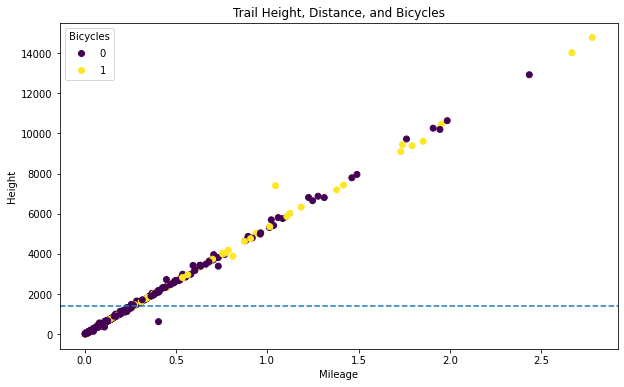

In [ ]:
#Creating a plot of the Mileage, Height, and Trail Type
fix, ax = plt.subplots(figsize = (10,6))
scatter = ax.scatter(x=TrailsDF["Mileage"], y=TrailsDF["Height"], c=TrailsDF["Bicycles"]);

#Title
ax.set(title="Trail Height, Distance, and Bicycles", xlabel = "Mileage", ylabel= "Height");

#legend
ax.legend(*scatter.legend_elements(), title= "Bicycles")

#Horizontal Line
ax.axhline(TrailsDF["Height"].mean(), linestyle='--')


Create a chart of Mileage and Height using the Best Fit Line

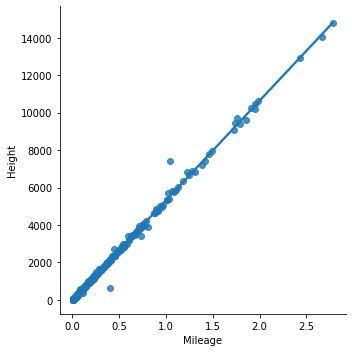

In [ ]:
sns.lmplot(x="Mileage", y="Height", data=TrailsDF);

Pie Chart
Create a pie chart using Difficulty of the trails

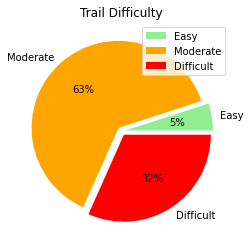

In [ ]:
#choose the colors
colors = ['lightgreen', 'Orange', 'red']
#add space between each piece of the pie
explode = (0.05, 0.05, 0.05)
#add Labels
labels = 'Easy', 'Moderate', 'Difficult'
#Make the chart
TrailsDF.groupby(['Difficulty']).sum().plot(kind='pie', y='TrailName', autopct='%1.0f%%', colors=colors, legend = True, title= 'Trail Difficulty', ylabel='', explode=explode, labels=labels)



Bubble Chart
This bubble chart shows the relation between mileage, trail status of open or closed, and the difficulty of the trail.

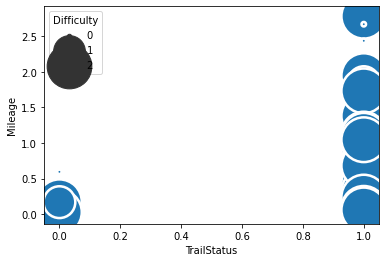

In [ ]:
#Make a bubble graph
sns.scatterplot(data=TrailsDF, x="TrailStatus", y="Mileage", size="Difficulty", legend=True, sizes=(20, 2000))
# show the graph
plt.show()

The Histogram shows that most trails are below 2000 feet high. It shows that nearly 400 trails have a height that is less that 2000 feet.

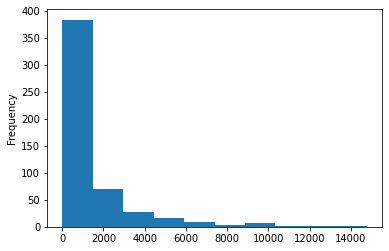

In [ ]:
#Histogram
TrailsDF["Height"].plot.hist();

Bar graph shows the relation between bicycles and difficulty.

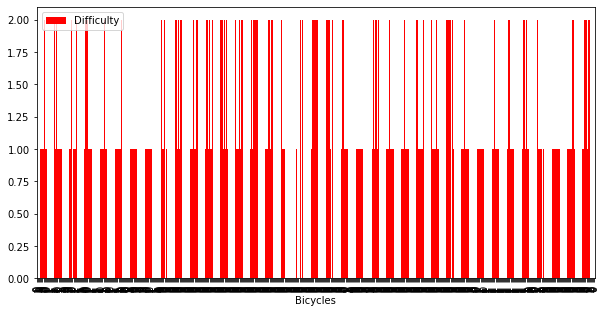

In [ ]:
#Bar Graph
TrailsDF.plot(x="Bicycles", y=["Difficulty"], kind="bar", figsize=(10, 5), color = 'Red')

Trail details are shown below.

In [ ]:
#Show the data description
TrailsDF.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,521.0,2979.781190,211.401982,2675.000,2823.000,2976.000,3110.000,4080.000
Bicycles,521.0,0.226488,0.418960,0.000,0.000,0.000,0.000,1.000
Display,521.0,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000
TrailType,521.0,0.224568,0.417699,0.000,0.000,0.000,0.000,1.000
DateFrom,521.0,36.654511,37.227208,0.000,1.000,24.000,70.000,123.000
DateTo,521.0,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000
Horses,521.0,0.811900,0.391167,0.000,1.000,1.000,1.000,1.000
Mileage,521.0,0.261155,0.393294,0.003,0.036,0.109,0.307,2.779
Height,521.0,1385.631478,2097.541870,15.000,182.000,574.000,1617.000,14775.000
TrailName,521.0,82.819578,46.502461,0.000,43.000,83.000,125.000,159.000
